In [10]:
%run kernels.ipynb

# Оценка параметров распределения для выборки времени происшествия события относительно предыдущего события и критерий хи2
## 1. Чтение данных и их начальная обработка

In [11]:
data = pd.read_csv('C:/Users/User/Desktop/Study/Scientific_work/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1', low_memory=False)
print("Input data shape: " , data.shape)
data = data.drop(data.iloc[:, 9:],  axis=1)
data = data.drop(data.columns[[0, 4, 5, 6]], axis = 1)

Input data shape:  (181691, 135)


## 2. Выборка данных для России

In [12]:
df_russia = data[ (data["country_txt"] == "Russia") | (data["country_txt"] == "Soviet Union")  ] 
print("Data for Russia shape: " , df_russia.shape)
data.head()
df_russia.head()

Data for Russia shape:  (2272, 5)


,iyear,imonth,iday,country,country_txt
5768,1978,1,8,359,Soviet Union
38018,1989,4,20,359,Soviet Union
38019,1989,4,20,359,Soviet Union
39006,1989,7,26,359,Soviet Union
39007,1989,7,26,359,Soviet Union


## 3. Обработка данных для России

In [13]:
df_size = df_russia.shape[0];
df_russia = compute_and_add_days(df_russia, "days from start")
print("Preprocess data for Russia, with days from start, shape: " , df_russia.shape)

Preprocess data for Russia, with days from start, shape:  (2267, 6)


## 4. Применение первого метода разбиения

In [14]:
step_0 = 10;
step_1 = 15
step_2 = 30
d_step = 10 
time_proc = (df_russia.iloc[:,5:].values).reshape(2267)
time_proc = np.diff(time_proc)
#print(time_proc)
#time_arr, requests = make_reduce(df_russia, third_method_reduce, [step_0, step_1, step_2,d_step] , "Russia")
time_arr, requests = make_reduce(df_russia, first_method_reduce, step_0 , "Russia")

Reduce data for Russia with days from start, shape:  240
time intervals = 
[4120   97   30   22   18   92   45   34   19   16   28   14   33   17
   64  110   25   21   12   39   25   24   25   12   23   61   31   54
   11   20   37   13   73   21   70   19   14  451   40   25   22   40
   47   19   60   20   13   67   13   55   28   35   35   24   34   39
   24   36   48   79   17   12   24   29   34   59   18   35   44   25
   46   45   12   35   20   64   43   40   31   35   44   45   18   12
   40   31   44   11   39   26   55   19   31   50   21   28   80   49
   15   36   20   40   14   35   35   26   35  160   27   57   38   29
   13   57   14   97   45   90   13   16   76   30   45   25   77   60
   21   30   15   49   75   12   17   38   14   75   13   12   68   20
   41   43   46   25   40   13   33   35   16   54   31  125   75   26
   23   46   46   19   23   34   56   15   38   80   60   12   46   29
   15   28   34   35   77   14   26   29   14  198   33   53  237   30
  

## 5. Проверка на независимость критерием Валлиса-Мура

In [15]:
alfa = 0.05
print("Wallis-Moore criterion")
Wallis_Murr_crit(time_proc, alfa, "Time initial for Russia")
Wallis_Murr_crit(time_arr, alfa, "Time diffs for Russia")
Wallis_Murr_crit(requests, alfa, "Requests for Russia")    

Wallis-Moore criterion
Time initial for Russia  - dependet 5.7  >  1.96
Time diffs for Russia  - undependet 1.08  <=  1.96
Requests for Russia  - undependet 1.33  <=  1.96


## 6. Основное исследование

parameters p, a1, a2 =  [ 0.841  2.939 37.52 ]
Chi2 degree:  11
Chi2 statistic:          5.11
Chi2 threshold value right: 19.68


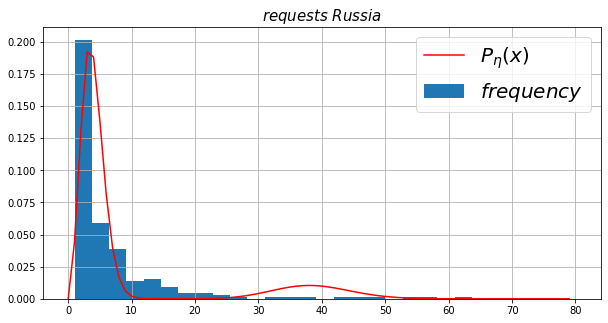

In [36]:
delimiter = 15
missed_vals = 2


sample1, sample2 = process_sample(requests, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_Poisson(sample1)

param2 = GMM_Poisson(sample2)

P1 = Poisson_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", r"$P_\eta(x)$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests, r, Mixed, alfa, 3)

parameters p, a1, a2 =  [ 0.871  3.377 42.529]
Chi2 degree:  11
Chi2 statistic:          5.06
Chi2 threshold value right: 19.68


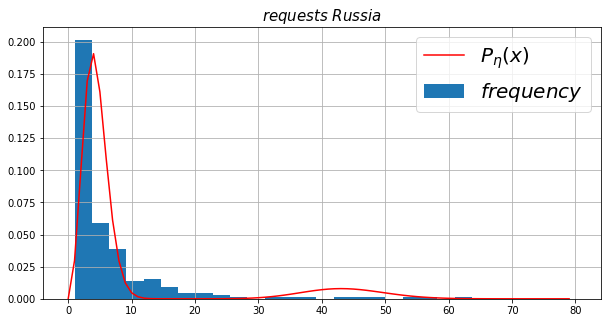

In [35]:
delimiter = 20
missed_vals = 3


sample1, sample2 = process_sample(requests, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_Poisson(sample1)

param2 = GMM_Poisson(sample2)

P1 = Poisson_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", r"$P_\eta(x)$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests, r, Mixed, alfa, 3)

parameters p, a1, a2 =  [ 0.915  0.205 57.417]
parameters 80% p, a1, a2 =  [ 0.897  0.196 53.727]
parameters 20% p, a1, a2 =  [  0.946   0.249 118.   ]


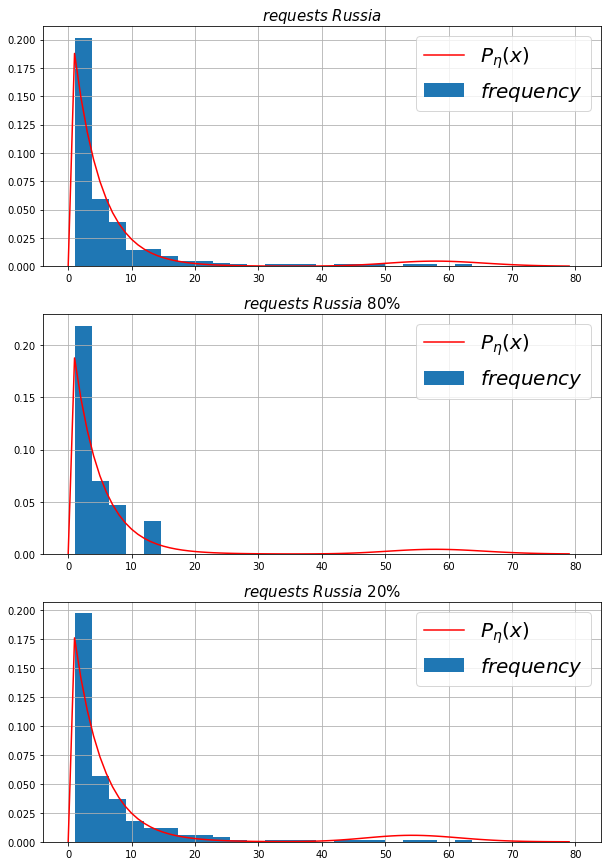

In [72]:
delimiter = 30
missed_vals = 2
sample_size = len(requests) 
sample1, sample2 = process_sample(requests[:sample_size], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests[:sample_size], a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)

nrow = 3
fig, (ax1, ax2, ax3) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $Russia$", r"$P_\eta(x)$", 30)




delimiter = 30
missed_vals = 2
sample_size = len(requests) // 10 * 8

sample1, sample2 = process_sample(requests[:sample_size], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests[:sample_size], a1, a2)
print("parameters 80% p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed1 = mix_distrib_param(param3, P1, P2)

plot_hist(requests[sample_size:], 80, Mixed, ax2, "$requests$ $Russia$ 80%", r"$P_\eta(x)$", 30)




delimiter = 15
missed_vals = 0
sample_size = len(requests) // 10 * 8
sample1, sample2 = process_sample(requests[sample_size:], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests[:sample_size], a1, a2)
print("parameters 20% p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3, P1, P2)
plot_hist(requests[:sample_size], 80, Mixed1, ax3, "$requests$ $Russia$ 20%", r"$P_\eta(x)$", 30)

#alfa = 0.05
#r = 15
#Chi_2_crit(requests[sample_size:], r, Mixed, alfa, 3)


parameters h, sigma =  [11, 33.7688545225565]
Chi2 degree:  9
Chi2 statistic:          0.11
Chi2 threshold value right: 16.92


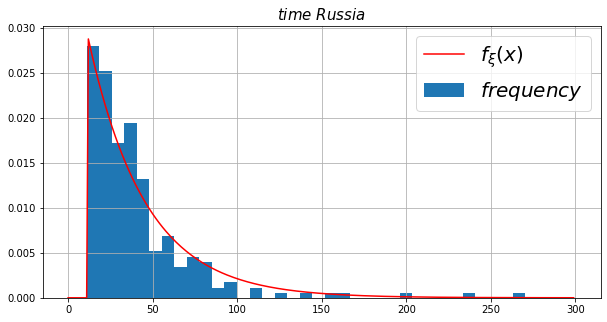

In [47]:
missed_vals = 3
param = GMM_shift_exp(time_arr, missed_vals)
P , F = shift_exp_param([min(time_arr), param[1]])
print("parameters h, sigma = ", [min(time_arr), param[1]])

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(time_arr, 300, P, ax1, "$time$ $Russia$", r"$f_\xi(x)$", 40)

alfa = 0.05
r = 12
Chi_2_crit1(time_arr, r, F, alfa, 2)


## Для Америки

In [20]:
df_usa = data[(data["country_txt"] == "United States")] 
print("Data for USA shape: " , df_usa.shape)

Data for USA shape:  (2836, 5)


In [21]:
df_usa = compute_and_add_days(df_usa, "days from start")
print("Preprocess data for USA, with days from start, shape: " , df_usa.shape)
df_usa.head()

Preprocess data for USA, with days from start, shape:  (2803, 6)


,iyear,imonth,iday,country,country_txt,days from start
0,1970,1,1,217,United States,0
1,1970,1,1,217,United States,0
2,1970,1,2,217,United States,1
3,1970,1,2,217,United States,1
4,1970,1,3,217,United States,2


In [29]:
step_0 = 10;
step_1 = 15
step_2 = 30
d_step = 10 

time_proc1 = (df_usa.iloc[:,5:].values).reshape(2803)
time_proc1 = np.diff(time_proc1)
print(time_proc1)
#time_arr1, requests1 = make_reduce(df_usa, third_method_reduce, [step_0, step_1, step_2,d_step], "USA")
#time_arr, requests = make_reduce(df_russia, third_method_reduce, [step_0, step_1, step_2,d_step] , "Russia")
time_arr1, requests1 = make_reduce(df_usa, first_method_reduce, step_1 , "Russia")

[ 0  1  0 ...  4 11  0]
Reduce data for Russia with days from start, shape:  292
time intervals = 
[800  59  83  17  28  88 176  43  40  52  38  64  27 149  67  28  36 278
  83 187  73  24  48  38  33 351 140 142 128  84 112  21 162  24  30  31
  17  46  37  23  50  20 114  27  75  43  79  55  28  33  32  37  96 195
  35  34  74  68  30  52  42  34 101  84  56  19  37  46  24  26  30  30
  18  66  30  21  94  63  42  56  24  35  26  48  99  24  55  39  63  31
  72  18  38  77  45  23  43  59  50  61  35  26  90  25  61  57  38  24
  45  59  23  80  17  19  19  62  67  63  87  54  34  72  34  24  35  47
  62  56  84 439  19  21  43  49  62  48 260  18  56  44  21  21 154  28
  21  48  40  73  51 129  27  59  99  33  57  28  31  39  36  73  18 109
  77  97  44  53  88  67  16  56  20  20  16  17  49  44  38  85  38  36
  16  52  58 119  21  57  40  31  31  38  41  66  36  19  42  62  21  68
  21  54  28  82  59  19  55  18 160  18  42  35  52  60 139  30  28  45
 119  28  45 188  38  60 

In [30]:
alfa = 0.05
print("Wallis-Mur criterion")
Wallis_Murr_crit(time_proc1, alfa, "Time initial for USA")
Wallis_Murr_crit(time_arr1, alfa, "Time diffs for USA")
Wallis_Murr_crit(requests1, alfa, "Requests for USA")

Wallis-Mur criterion
Time initial for USA  - dependet 10.11  >  1.96
Time diffs for USA  - undependet 0.79  <=  1.96
Requests for USA  - undependet 1.3  <=  1.96


parameters p, a1, a2 =  [ 0.903  0.206 51.   ]
Chi2 degree:  11
Chi2 statistic:          0.7
Chi2 threshold value right: 19.68


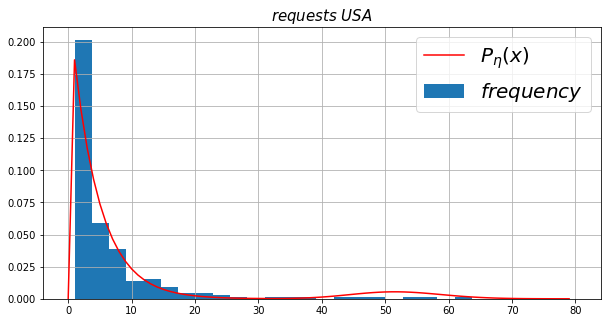

In [46]:
delimiter = 30
missed_vals = 1


sample1, sample2 = process_sample(requests1, delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests, a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3[0], P1, P2)

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests, 80, Mixed, ax1, "$requests$ $USA$", r"$P_\eta(x)$", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests1, r, Mixed, alfa, 3)


In [ ]:
delimiter = 30
missed_vals = 0
sample_size1 = len(requests1)//10 * 8


sample1, sample2 = process_sample(requests1[:sample_size1], delimiter, missed_vals)
a1 = np.average(sample1)
a2 = np.average(sample2)
param1 = GMM_geom(sample1)

param2 = GMM_Poisson(sample2)

P1 = geom_param(param1)
P2 = Poisson_param(param2)
param3 = GMM_mix_distrib(requests1[:sample_size1], a1, a2)
print("parameters p, a1, a2 = ", np.around([param3[0], param1, param2], 3))
Mixed = mix_distrib_param(param3[0], P1, P2)

nrow = 2
fig, (ax1, ax2) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(requests1[sample_size1:], 80, Mixed, ax1, "$requests$ $USA$ 20%", 30)
plot_hist(requests1[:sample_size1], 80, Mixed, ax2, "$requests$ $USA$ 80%", 30)

alfa = 0.05
r = 15
Chi_2_crit(requests1, r, Mixed, alfa, 3)

parameters h, sigma =  [16, 42.873015394869796]
Chi2 degree:  9
Chi2 statistic:          0.09
Chi2 threshold value right: 16.92


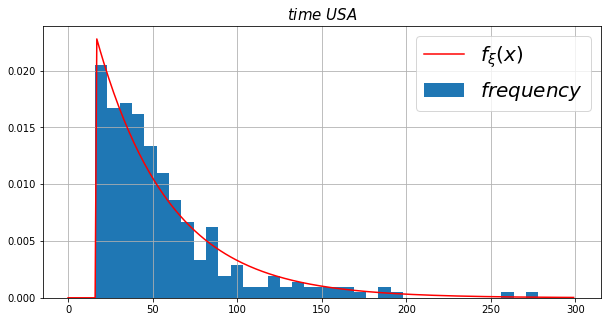

In [49]:
missed_vals = 2
param = GMM_shift_exp(time_arr1, missed_vals)
P , F = shift_exp_param([min(time_arr1), param[1]])
print("parameters h, sigma = ", [min(time_arr1), param[1]])

nrow = 1
fig, (ax1) = plt.subplots(nrows=nrow, figsize=(10,5*nrow))
plot_hist(time_arr1, 300, P, ax1, "$time$ $USA$", r'$f_\xi(x)$', 40)

alfa = 0.05
r = 12
Chi_2_crit1(time_arr1, r, F, alfa, 2)